In [1]:
# importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score


In [2]:
# loading the iris dataset
data = load_iris()

X = data.data
y = data.target

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (150, 4)
Target vector shape: (150,)


In [3]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 105
Testing samples: 45


In [4]:
# training a decision tree classifier on the original training data
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# predicting on the test set
y_pred_baseline = baseline_model.predict(X_test)

# calculating baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline Train-Test Accuracy:", baseline_accuracy)


Baseline Train-Test Accuracy: 0.9333333333333333


In [5]:
# number of bootstrap iterations
n_iterations = 100

# list to store accuracy values from each bootstrap sample
bootstrapped_accuracies = []


In [6]:
for i in range(n_iterations):
    # creating a bootstrap sample from the training data
    X_resampled, y_resampled = resample(
        X_train,
        y_train,
        replace=True,
        random_state=i
    )
    
    # training the model on the bootstrapped sample
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # predicting on the same test set
    y_pred = model.predict(X_test)
    
    # calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # storing the accuracy
    bootstrapped_accuracies.append(accuracy)


In [7]:
# calculating mean and standard deviation
mean_accuracy = np.mean(bootstrapped_accuracies)
std_accuracy = np.std(bootstrapped_accuracies)

print("Bootstrapped Mean Accuracy:", mean_accuracy)
print("Bootstrapped Accuracy Standard Deviation:", std_accuracy)


Bootstrapped Mean Accuracy: 0.9197777777777779
Bootstrapped Accuracy Standard Deviation: 0.03249235427634866


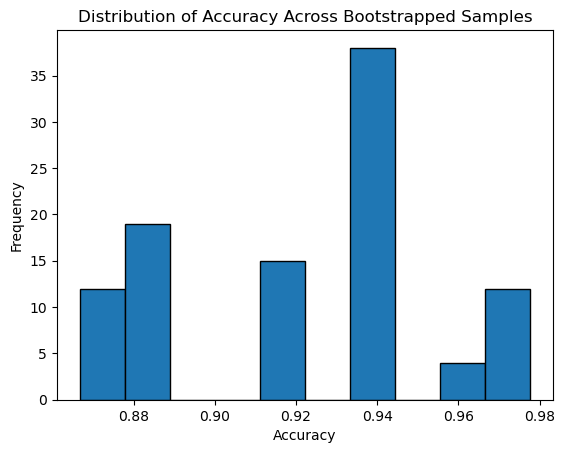

In [8]:
# plotting the distribution of accuracies
plt.hist(bootstrapped_accuracies, bins=10, edgecolor="black")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Distribution of Accuracy Across Bootstrapped Samples")
plt.show()
